In [1]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:
conn = sqlite3.connect('database.db')

In [3]:
ci = conn.cursor()

In [4]:
ci.executescript('drop table if exists hari')
ci.executescript('drop table if exists channel')
ci.executescript('drop table if exists tipe')
ci.executescript('drop table if exists source')
ci.executescript('drop table if exists program')

ci.execute("CREATE TABLE IF NOT EXISTS 'hari' ('id' INT, 'nama_hari' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ci.execute("CREATE TABLE IF NOT EXISTS 'channel' ('id' INT, 'nama_channel' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ci.execute("CREATE TABLE IF NOT EXISTS 'tipe' ('id' INT, 'nama_tipe' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ci.execute("CREATE TABLE IF NOT EXISTS 'source' ('id' INT, 'nama_source' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
ci.execute("CREATE TABLE IF NOT EXISTS 'program' ( 'id' INT, 'nama_program' VARCHAR(255) NULL, 'time_start' VARCHAR(255) NULL, 'durasi' VARCHAR(255) NULL, 'tanggal' DATE NULL, 'cost' VARCHAR(255) NULL, 'tvr' VARCHAR(255) NULL, 'audients' VARCHAR(255) NULL, 'share' VARCHAR(255) NULL, 'hari_id' INT NOT NULL, 'channel_id' INT NOT NULL, 'tipe_id' INT NOT NULL, 'source_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('hari_id') REFERENCES 'hari' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('channel_id') REFERENCES 'channel' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('tipe_id') REFERENCES 'tipe' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('source_id') REFERENCES 'source' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [8]:
df = pd.read_csv("dataset.csv")
df

,Tanggal,Hari,Nama,Pukul,Durasi,Cost,TVR,Audients,Share,Market,Tipe,Source,Channel
0,6/2/2020,Rabu,Sinema Dini Hari,1:30,2 jam,Rp. 60.000.000,2.5,20 Jt Orang,10.4,Surabaya,Drama,Indonesia,Trans tv
1,6/2/2020,Rabu,Sinema Spesial,3:30,"1,5 jam",Rp. 60.000.000,2.5,20 jt Orang,9.7,Surabaya,Drama,Indonesia,Trans tv
2,6/2/2020,Rabu,Islam Itu Indah,5:00,"1,5 jam",Rp. 50.000.000,5.5,100 Jt Orang,15.2,Indonesia,Religi,Indonesia,Trans tv
3,6/2/2020,Rabu,Insert Pagi,6:30,1 jam,Rp. 50.000.000,7.5,150 Jt Orang,16.4,Indonesia,Hiburan,Indonesia,Trans tv
4,6/2/2020,Rabu,CNN Indonesia,7:30,1 jam,Rp. 50.000.000,7.5,155 Jt Orang,12.7,Indonesia,Berita,Indonesia,Trans tv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,6/8/2020,Senin,Diary The Onsu,18:00,1 jam,Rp. 55.000.000,7.2,100 Jt Orang,11.2,Indonesia,Drama Hiburan,Indonesia,Trans tv
104,6/8/2020,Senin,Drama Korea VIP,19:00,2 jam,Rp. 65.000.000,5.4,155 Jt Orang,15.8,Indonesia,Drama Korea,Indonesia,Trans tv
105,6/8/2020,Senin,CNN Indonisa Prime News,21:00,"0,5 jam",Rp. 150.000.000,7.7,100 Jt Orang,14.7,Indonesia,Berita,Indonesia,Trans tv
106,6/8/2020,Senin,Bioskop Trans Tv (The Town),21:30,2 jam,Rp. 155.000.000,7.1,130 Jt Orang,11.9,Indonesia,Hiburan,Indonesia,Trans tv


In [9]:
hari = []
channel = []
tipe = []
source = []

for i,j in df.iterrows():
    if j[1] not in hari:
        hari.append(j[1])
    h = -1
    for index, value in enumerate(hari):
        if value == j[1]: 
            h = index+1
            break
        
    if [j[12]] not in channel:
        channel.append([j[12]])
    c = -1
    for index, value in enumerate(channel):
        if value == j[12]:
            c = index+1
            break
        
    if [j[10]] not in tipe:
        tipe.append([j[10]])
    t = -1
    for index, value in enumerate(tipe):
        if value == j[10]:
            t = index+1
            break
    
    if [j[11]] not in source:
        source.append([j[11]])
    s = -1
    for index, value in enumerate(source):
        if value == j[11]:
            s = index+1
            break


program = []
for i,j in df.iterrows():   
    h = -1
    
    for index, value in enumerate(hari):
        if value == j[1]:
            h = index+1
            break
    
    cha = -1
    for index, value in enumerate(channel):
        if value[0] == j[12]:
            cha = index+1
            break
        
    tip = -1
    for index, value in enumerate(tipe):
        if value[0] == j[10]:
            tip = index+1
            break
    
    sou = -1
    for index, value in enumerate(source):
        if value[0] == j[11]:
            sou = index+1
            break
    
    program.append([j[2], j[3], j[4], j[0], j[5].replace("Rp. ", "").replace(".", ""), j[6], j[7].replace(" Jt ", "000").replace("Orang", "000").replace(" jt ", "000"), j[8], h, cha, tip, sou])

In [10]:

ci.execute("DELETE FROM CHANNEL")
for index, i in enumerate(channel): 
    ci.execute("INSERT INTO CHANNEL VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")
    
ci.execute("DELETE FROM TIPE")
for index, i in enumerate(tipe): 
    ci.execute("INSERT INTO TIPE VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")
    
ci.execute("DELETE FROM SOURCE")
for index, i in enumerate(source): 
    ci.execute("INSERT INTO SOURCE VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")
    
ci.execute("DELETE FROM HARI")
for index, i in enumerate(hari): 
    ci.execute("INSERT INTO HARI VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")

ci.execute("DELETE FROM PROGRAM")
for index, i in enumerate(program):
    hari_id = i[8]
    channel_id = i[9]
    tipe_id = i[10]
    source_id = i[11]
    ci.execute("INSERT INTO PROGRAM VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "','" + str(i[3]) + "','" + str(i[4]) + "','" + str(i[5]) + "','" + str(i[6]) + "','" + str(i[7]) + "'," + str(hari_id) + "," + str(channel_id) + "," + str(tipe_id) + "," + str(source_id) + ")")

    
conn.commit()

In [11]:
ci.execute('''SELECT * FROM CHANNEL''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("========================CHANNEL================================")
print(KOTA)
print("============================================================")

ci.execute('''SELECT * FROM TIPE''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("========================'TIPE'================================")
print(KOTA)
print("============================================================")


ci.execute('''SELECT * FROM SOURCE''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("========================SOURCE================================")
print(KOTA)
print("============================================================")

ci.execute('''SELECT * FROM HARI''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("========================HARI================================")
print(KOTA)
print("============================================================")

ci.execute('''SELECT * FROM PROGRAM''')

KOTA = []
for row in ci.fetchall():
    KOTA.append(row)
print("========================PROGRAM================================")
print(KOTA)
print("============================================================")

========================CHANNEL================================
[(1, 'Trans tv')]
========================'TIPE'================================
[(1, 'Drama'), (2, 'Religi'), (3, 'Hiburan'), (4, 'Berita'), (5, 'Drama Komedi'), (6, 'Drama Korea'), (7, 'Drama Hiburan')]
========================SOURCE================================
[(1, 'Indonesia')]
========================HARI================================
[(1, 'R'), (2, 'K'), (3, 'J'), (4, 'S'), (5, 'M'), (6, 'S')]
========================PROGRAM================================
[(1, 'Sinema Dini Hari', '1:30', '2 jam', '6/2/2020', ' 60000000', '2.5', '20000000', '10.4', 1, 1, 1, 1), (2, 'Sinema Spesial', '3:30', '1,5 jam', '6/2/2020', ' 60000000', '2.5', '20000000', '9.7', 1, 1, 1, 1), (3, 'Islam Itu Indah', '5:00', '1,5 jam', '6/2/2020', ' 50000000', '5.5', '100000000', '15.2', 1, 1, 2, 1), (4, 'Insert Pagi', '6:30', '1 jam', '6/2/2020', ' 50000000', '7.5', '150000000', '16.4', 1, 1, 3, 1), (5, 'CNN Indonesia', '7:30', '1 jam', '6/

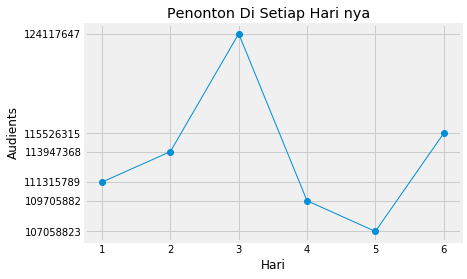

,Hari,Jumlah
1,1.0,1.113158e+08
2,2.0,1.139474e+08
3,3.0,1.241176e+08
4,4.0,1.097059e+08
5,5.0,1.070588e+08
6,6.0,1.155263e+08


In [12]:
ci.execute('''select * from(select hari_id, avg(audients) as jumlah_penonton from program group by hari_id)''')
jumlah = []
for row in ci.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([int (x[0]) for x in np_hari [:,:]], [ int(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_hari[:,:]], [ int(x[0]) for x in np_hari[:,:]])
plt.yticks([ int(x[1]) for x in np_hari[:,:]], [ int(x[1]) for x in np_hari[:,:]])
plt.xlabel('Hari')
plt.ylabel('Audients')
plt.title("Penonton Di Setiap Hari nya  ")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Hari', 'Jumlah']
df.index = np.arange(1,len(df)+1)
df

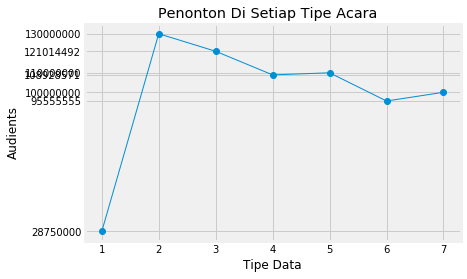

,Hari,Jumlah
1,1.0,2.875000e+07
2,2.0,1.300000e+08
3,3.0,1.210145e+08
4,4.0,1.089286e+08
5,5.0,1.100000e+08
6,6.0,9.555556e+07
7,7.0,1.000000e+08


In [13]:
ci.execute('''select * from(select tipe_id, avg(audients) as jumlah_penonton from program group by tipe_id)''')
jumlah = []
for row in ci.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([int (x[0]) for x in np_hari [:,:]], [ int(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_hari[:,:]], [ int(x[0]) for x in np_hari[:,:]])
plt.yticks([ int(x[1]) for x in np_hari[:,:]], [ int(x[1]) for x in np_hari[:,:]])
plt.xlabel('Tipe Data')
plt.ylabel('Audients')
plt.title("Penonton Di Setiap Tipe Acara  ")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Hari', 'Jumlah']
df.index = np.arange(1,len(df)+1)
df

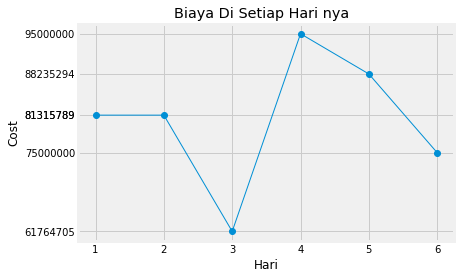

,Hari,Cost
1,1.0,8.131579e+07
2,2.0,8.131579e+07
3,3.0,6.176471e+07
4,4.0,9.500000e+07
5,5.0,8.823529e+07
6,6.0,7.500000e+07


In [14]:
ci.execute('''select * from(select hari_id, avg(cost) as jumlah_penonton from program group by hari_id)''')
jumlah = []
for row in ci.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([int (x[0]) for x in np_hari [:,:]], [ int(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_hari[:,:]], [ int(x[0]) for x in np_hari[:,:]])
plt.yticks([ int(x[1]) for x in np_hari[:,:]], [ int(x[1]) for x in np_hari[:,:]])
plt.xlabel('Hari')
plt.ylabel('Cost')
plt.title("Biaya Di Setiap Hari nya  ")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Hari', 'Cost']
df.index = np.arange(1,len(df)+1)
df

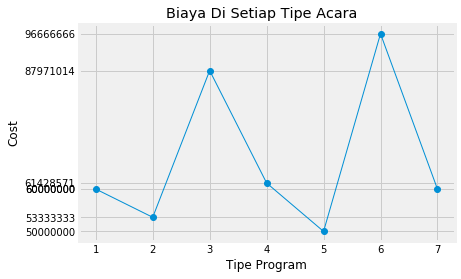

,Tipe Program,Cost
1,1.0,6.000000e+07
2,2.0,5.333333e+07
3,3.0,8.797101e+07
4,4.0,6.142857e+07
5,5.0,5.000000e+07
6,6.0,9.666667e+07
7,7.0,6.000000e+07


In [15]:
ci.execute('''select * from(select tipe_id, avg(cost) as jumlah_penonton from program group by tipe_id)''')
jumlah = []
for row in ci.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([int (x[0]) for x in np_hari [:,:]], [ int(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_hari[:,:]], [ int(x[0]) for x in np_hari[:,:]])
plt.yticks([ int(x[1]) for x in np_hari[:,:]], [ int(x[1]) for x in np_hari[:,:]])
plt.xlabel('Tipe Program')
plt.ylabel('Cost')
plt.title("Biaya Di Setiap Tipe Acara  ")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Tipe Program', 'Cost']
df.index = np.arange(1,len(df)+1)
df

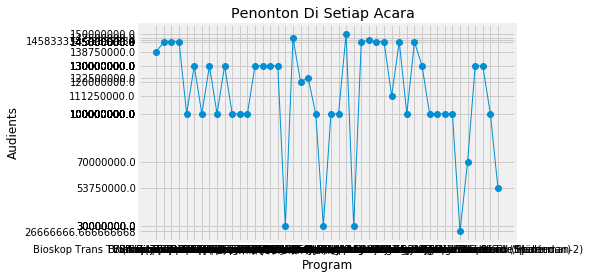

,Program,Audients
1,Bajaj Bajuri,138750000.0
2,Bikin Laper,145000000.0
3,Bikin Laper Weekend,145000000.0
4,Bioskop Trans TV,145000000.0
5,Bioskop Trans TV (Anaconda: The Hunt For The B...,100000000.0
6,Bioskop Trans TV (Escape Plane),130000000.0
7,Bioskop Trans TV (Hunger Game),100000000.0
8,Bioskop Trans TV (Premium Rush),130000000.0
9,Bioskop Trans TV (The Last Days On March),100000000.0
10,Bioskop Trans Tv (Apollo 18),130000000.0


In [16]:
ci.execute('''select * from(select nama_program, avg(audients) as jumlah_penonton from program group by nama_program)''')
jumlah = []
for row in ci.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([str (x[0]) for x in np_hari [:,:]], [ float(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_hari[:,:]], [ str(x[0]) for x in np_hari[:,:]])
plt.yticks([ float(x[1]) for x in np_hari[:,:]], [ float(x[1]) for x in np_hari[:,:]])
plt.xlabel('Program')
plt.ylabel('Audients')
plt.title("Penonton Di Setiap Acara  ")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Program', 'Audients']
df.index = np.arange(1,len(df)+1)
df

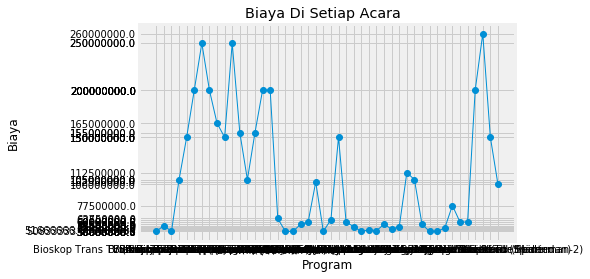

,Program,Biaya
1,Bajaj Bajuri,50000000.0
2,Bikin Laper,56250000.0
3,Bikin Laper Weekend,50000000.0
4,Bioskop Trans TV,105000000.0
5,Bioskop Trans TV (Anaconda: The Hunt For The B...,150000000.0
6,Bioskop Trans TV (Escape Plane),200000000.0
7,Bioskop Trans TV (Hunger Game),250000000.0
8,Bioskop Trans TV (Premium Rush),200000000.0
9,Bioskop Trans TV (The Last Days On March),165000000.0
10,Bioskop Trans Tv (Apollo 18),150000000.0


In [17]:
ci.execute('''select * from(select nama_program, avg(cost) as jumlah_penonton from program group by nama_program)''')
jumlah = []
for row in ci.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([str (x[0]) for x in np_hari [:,:]], [ float(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_hari[:,:]], [ str(x[0]) for x in np_hari[:,:]])
plt.yticks([ float(x[1]) for x in np_hari[:,:]], [ float(x[1]) for x in np_hari[:,:]])
plt.xlabel('Program')
plt.ylabel('Biaya')
plt.title("Biaya Di Setiap Acara  ")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Program', 'Biaya']
df.index = np.arange(1,len(df)+1)
df